### File  reading 

In [1]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as  plt
import  numpy as  np

In [3]:
path =  r"C:\Users\admin\Downloads\train.csv"

In [4]:
df  =  pd.read_csv(path)

## Basic data quality checks

In [5]:
df.head()

,id,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,0,L50096,L,300.6,309.6,1596,36.1,140,0,0,0,0,0,0
1,1,M20343,M,302.6,312.1,1759,29.1,200,0,0,0,0,0,0
2,2,L49454,L,299.3,308.5,1805,26.5,25,0,0,0,0,0,0
3,3,L53355,L,301.0,310.9,1524,44.3,197,0,0,0,0,0,0
4,4,M24050,M,298.0,309.0,1641,35.4,34,0,0,0,0,0,0


In [6]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

In [7]:
df.columns  =  ['id', 'Product ID', 'Type', 'Air temperature',
       'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF']

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136429 entries, 0 to 136428
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   136429 non-null  int64  
 1   Product ID           136429 non-null  object 
 2   Type                 136429 non-null  object 
 3   Air temperature      136429 non-null  float64
 4   Process temperature  136429 non-null  float64
 5   Rotational speed     136429 non-null  int64  
 6   Torque               136429 non-null  float64
 7   Tool wear            136429 non-null  int64  
 8   Machine failure      136429 non-null  int64  
 9   TWF                  136429 non-null  int64  
 10  HDF                  136429 non-null  int64  
 11  PWF                  136429 non-null  int64  
 12  OSF                  136429 non-null  int64  
 13  RNF                  136429 non-null  int64  
dtypes: float64(3), int64(9), object(2)
memory usage: 14.6+ MB


In [9]:
df.isnull().sum()

id                     0
Product ID             0
Type                   0
Air temperature        0
Process temperature    0
Rotational speed       0
Torque                 0
Tool wear              0
Machine failure        0
TWF                    0
HDF                    0
PWF                    0
OSF                    0
RNF                    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(0)

In [11]:
df.columns

Index(['id', 'Product ID', 'Type', 'Air temperature', 'Process temperature',
       'Rotational speed', 'Torque', 'Tool wear', 'Machine failure', 'TWF',
       'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')

##  seperate x  and y

In [13]:
x  =  df.drop(['id', 'Product ID',  "Machine failure"]  , axis =  1)
y  =  df['Machine failure']

In [14]:
x.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,L,300.6,309.6,1596,36.1,140,0,0,0,0,0
1,M,302.6,312.1,1759,29.1,200,0,0,0,0,0
2,L,299.3,308.5,1805,26.5,25,0,0,0,0,0
3,L,301.0,310.9,1524,44.3,197,0,0,0,0,0
4,M,298.0,309.0,1641,35.4,34,0,0,0,0,0


In [15]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Machine failure, dtype: int64

#### seperate cat and  num data

In [17]:
cat  =  x.columns[x.dtypes  ==  'object']
num  =  x.columns[x.dtypes  !=  'object']

In [22]:
print(cat)
print(num)

Index(['Type'], dtype='object')
Index(['Air temperature', 'Process temperature', 'Rotational speed', 'Torque',
       'Tool wear', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'],
      dtype='object')


In [23]:
x['Type'].isnull().sum()

np.int64(0)

### create  pipeline

In [24]:
from sklearn.pipeline  import Pipeline
from sklearn.compose  import ColumnTransformer
from sklearn.impute import SimpleImputer
from  sklearn.preprocessing  import StandardScaler  , OrdinalEncoder

In [28]:
num_pipeline  =  Pipeline(steps   =  [('imputer' ,SimpleImputer(strategy =  'mean' ) ),
                             ('scaler' , StandardScaler())])
cat_pipeline =  Pipeline(steps   =  [('imputer' ,SimpleImputer(strategy =  'most_frequent' ) ),
                             ('encoder' , OrdinalEncoder())])

In [29]:
pre  =  ColumnTransformer([('num' , num_pipeline ,  num ) ,  ('cat' , cat_pipeline  , cat)])

In [30]:
pre

,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'mean'
,fill_value,None


In [31]:
##  apply to data
x_scaled  =  pre.fit_transform(x)


In [32]:
x_scaled

array([[ 0.3958803 , -0.24623038,  0.54541592, ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 1.46985559,  1.55860483,  1.72030819, ..., -0.06303833,
        -0.04756777,  2.        ],
       [-0.30220363, -1.04035788,  2.05187289, ..., -0.06303833,
        -0.04756777,  1.        ],
       ...,
       [ 0.34218154,  1.34202461,  0.0264451 , ..., -0.06303833,
        -0.04756777,  1.        ],
       [ 0.98656671,  0.69228393, -0.52856537, ..., -0.06303833,
        -0.04756777,  1.        ],
       [-1.59097397, -1.32913151,  0.26430672, ..., -0.06303833,
        -0.04756777,  1.        ]], shape=(136429, 11))

In [33]:
x_scaled  =  pd.DataFrame(x_scaled  ,  columns  =  x.columns)

In [34]:
x_scaled.head()

,Type,Air temperature,Process temperature,Rotational speed,Torque,Tool wear,TWF,HDF,PWF,OSF,RNF
0,0.395880,-0.246230,0.545416,-0.499711,0.556417,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
1,1.469856,1.558605,1.720308,-1.323028,1.494433,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0
2,-0.302204,-1.040358,2.051873,-1.628831,-1.241447,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
3,0.610675,0.692284,0.026445,0.464745,1.447532,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,1.0
4,-1.000288,-0.679391,0.869773,-0.582043,-1.100744,-0.03945,-0.072021,-0.049016,-0.063038,-0.047568,2.0


#### feature  selection  by  mutual_info_score

In [36]:
from  sklearn.feature_selection import mutual_info_classif
mi  =  mutual_info_classif(x_scaled  ,  y  ,  n_jobs  =  -1)

In [37]:
mi

array([0.00593989, 0.00239593, 0.01906594, 0.01972756, 0.00652654,
       0.00782353, 0.02460139, 0.01137571, 0.01875528, 0.00126385,
       0.01125207])

In [39]:
mi  =  pd.Series(mi)

In [40]:
mi.index  =  x_scaled.columns

In [42]:
mi =  mi.sort_values()

In [43]:
mi

OSF                    0.001264
Air temperature        0.002396
Type                   0.005940
Torque                 0.006527
Tool wear              0.007824
RNF                    0.011252
HDF                    0.011376
PWF                    0.018755
Process temperature    0.019066
Rotational speed       0.019728
TWF                    0.024601
dtype: float64

<Axes: >

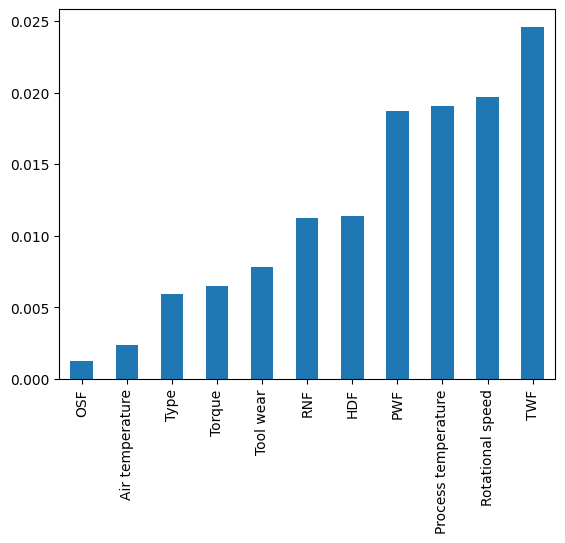

In [44]:
mi.plot(kind =  'bar')

In [51]:
len(mi)

11

In [52]:
len(x_scaled.columns)

11

### train test  split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train ,  x_test  ,  y_train ,  y_test  =  train_test_split(x_scaled  ,  y ,  test_size  =  0.2  ,  random_state  =  3)

In [47]:
print(x_train.shape , y_train.shape)
print(x_test.shape  ,  y_test.shape)

(109143, 11) (109143,)
(27286, 11) (27286,)


In [48]:
y_train.value_counts()

Machine failure
0    107418
1      1725
Name: count, dtype: int64

In [49]:
y_test.value_counts()

Machine failure
0    26863
1      423
Name: count, dtype: int64

In [50]:
y.value_counts()

Machine failure
0    134281
1      2148
Name: count, dtype: int64

## model fitting  

In [54]:
from sklearn.linear_model  import LogisticRegression  
from sklearn.tree  import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier  ,  GradientBoostingClassifier
import xgboost  as xgb
from xgboost  import XGBClassifier
from sklearn.svm import SVC 
from sklearn.neighbors  import KNeighborsClassifier


## Loistic  regression model  fitting

In [55]:
logreg  =  LogisticRegression()
logreg.fit(x_train  ,  y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [56]:
logreg.score(x_train  ,  y_train)

0.9961701620809397

In [57]:
logreg.score(x_test  ,  y_test)

0.9962251704170637

In [64]:
train_pred  =  logreg.predict(x_train)
test_pred  =  logreg.predict(x_test)

In [60]:
from sklearn.metrics  import classification_report  ,  f1_score  , confusion_matrix

In [61]:
print(classification_report(y_train , train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    107418
           1       0.99      0.76      0.86      1725

    accuracy                           1.00    109143
   macro avg       0.99      0.88      0.93    109143
weighted avg       1.00      1.00      1.00    109143



In [65]:
print(classification_report(y_test , test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     26863
           1       0.99      0.76      0.86       423

    accuracy                           1.00     27286
   macro avg       0.99      0.88      0.93     27286
weighted avg       1.00      1.00      1.00     27286



In [67]:
f1_score(y_train, train_pred)

0.8631303208906352

In [68]:
f1_score(y_test  ,  test_pred)

0.8624833110814419

In [ ]:
def  Evaluation( x_train  , y_train  , x_test  ,  y_test):

  data  =  {'LR'  :  LogisticRegression(),
          "DT" : DecisionTreeClassifier(max_depth  =  5 ,  min_samples_split=10 ),
          "RF" : RandomForestClassifier(max_depth  =  5 ,  min_samples_split=10 ) ,
          "GB" : GradientBoostingClassifier( ) ,
          'XGB' : XGBClassifier() ,
          "KNN" : KNeighborsClassifier(n_neighbors= 7) ,
          "SVM" : SVC()}
  for  name  ,  model in  data.items():
    model.fit(x_train ,  y_train  )
    train_pred  =  model.predict(x_train)
    test_pred  =  model.predict(x_test)
    f1_tr  =  f1_score(y_train  ,  train_pred)
    f1_ts  =  f1_score(y_test  ,  test_pred)
    cv  = cross_val_score( estimator  =  model , X  =  x_train  ,  y  = y_train  ,  cv  =  5  ,  n_jobs= -1)
    CR_tr  =  classification_report(y_train  , train_pred  , )
    cf_tr  =  confusion_matrix(y_train  ,  train_pred)
    CR_test  =  classification_report(y_test  ,  test_pred)
    cf_test  =  confusion_matrix(y_test  , test_pred)

    print(f"{name}")
    print(f"Train f1  --> {f1_tr}")
    print(f"Test f1  -- > {f1_ts}")
    print(f"Cv  -->  {cv}")
    print(cv.mean())
    print(f"cr_tr  -- >  {CR_tr}")
    print(f"cf_tr --> {cf_tr}")
    print(f"CR_test  --> {CR_test}")
    print(f"cf_test --> {cf_test}")
    print()
    print('-------------------------------------------------')
    print()
